### Importing packages

In [1]:
import pandas as pd
import requests
from matplotlib import pyplot as plt

### Pandas test

Text(0.5, 1.0, 'TEST PLOT')

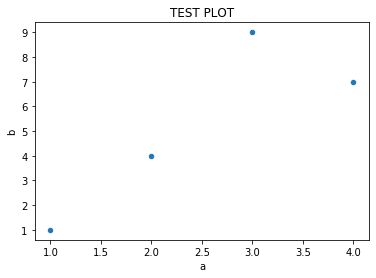

In [2]:
df = pd.DataFrame(
    {
        'a':[1, 2, 3, 4], 
        'b': [1, 4, 9, 7]
    }
)

df.plot(kind="scatter", x="a", y="b")
plt.title("TEST PLOT")

### Requests test

In [3]:
requests.__version__

'2.18.4'

### Yelp API test

In [5]:
# keys = pd.read_json("./private/keys.json", orient="values")
# client_id = keys["client_id"][0]
# api_key = keys["api_key"][0]

api_key = "PASTE-YOUR-API-KEY-INSIDE-THESE-QUOTATION-MARKS"

Set up the API request. We'll be querying laundromats in Newark, NJ because... [why not?](https://www.youtube.com/watch?v=nxaCSy5MNEA)

In [6]:
# Define the base URL for the request
base_url = "https://api.yelp.com/v3/businesses/search"

# Set up the request headers -- API key is used here
headers = {"Authorization": "Bearer " + api_key}

# Define the request parameters
params = {
    "location": "Newark, NJ",
    "term": "laundromat"
}

Now execute the request, saving the response in a variable called `response`.

In [7]:
response = requests.get(
    base_url,
    headers=headers,
    params=params
)

Fantastic! Now, let's inspect the `response` object. First, look at its attribute `url`.

In [8]:
response.url

'https://api.yelp.com/v3/businesses/search?location=Newark%2C+NJ&term=laundromat'

Now let's inspect the `text` attribute.

In [9]:
response.text

'{"businesses": [{"id": "aBqDLjEXn_6OzDY9GV6Kig", "alias": "laundry-warehouse-newark-newark-2", "name": "Laundry Warehouse - Newark", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/Cl-KinHTVJy90yNN34l9Bw/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/laundry-warehouse-newark-newark-2?adjust_creative=HaVWHjpYdXnjvhy98Kc7-A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=HaVWHjpYdXnjvhy98Kc7-A", "review_count": 1, "categories": [{"alias": "laundromat", "title": "Laundromat"}], "rating": 5.0, "coordinates": {"latitude": 40.72284, "longitude": -74.1509899}, "transactions": [], "location": {"address1": "156 Wilson Ave", "address2": null, "address3": "", "city": "Newark", "zip_code": "07105", "country": "US", "state": "NJ", "display_address": ["156 Wilson Ave", "Newark, NJ 07105"]}, "phone": "+19733447081", "display_phone": "(973) 344-7081", "distance": 2234.439249154157}, {"id": "oKFMo6ulZ3X1ws0Q6lyExA", "alias": "laundry-fresh-newark", "name": "La

Look, there are ratings, zipcodes, longitudes and latitudes... That looks like the data we requested! But it's a little messy. Let's use the `json()` method to see it in a more structured way.

In [10]:
response.json()

{'businesses': [{'id': 'aBqDLjEXn_6OzDY9GV6Kig',
   'alias': 'laundry-warehouse-newark-newark-2',
   'name': 'Laundry Warehouse - Newark',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Cl-KinHTVJy90yNN34l9Bw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/laundry-warehouse-newark-newark-2?adjust_creative=HaVWHjpYdXnjvhy98Kc7-A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=HaVWHjpYdXnjvhy98Kc7-A',
   'review_count': 1,
   'categories': [{'alias': 'laundromat', 'title': 'Laundromat'}],
   'rating': 5.0,
   'coordinates': {'latitude': 40.72284, 'longitude': -74.1509899},
   'transactions': [],
   'location': {'address1': '156 Wilson Ave',
    'address2': None,
    'address3': '',
    'city': 'Newark',
    'zip_code': '07105',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['156 Wilson Ave', 'Newark, NJ 07105']},
   'phone': '+19733447081',
   'display_phone': '(973) 344-7081',
   'distance': 2234.439249154157},
  {'id':

Excellent! That data is structured as a _dictionary_, a very common data structure in python and other programming languages. Dictionaries have "keys" and "values", where each key is mapped to a single value. Let's take a quick look at this dictionary! First, let's save it into a variable so we can access it more easily:

In [11]:
# Save dictionary containing response data
data_dict = response.json()

Now, let's first inspect the keys of the dictionary.

In [12]:
data_dict.keys()

dict_keys(['businesses', 'total', 'region'])

As you can see, there are three keys in this dictionary. Let's see the values for each of those keys

In [13]:
# Inspect the value associated with the "region" key
data_dict["region"]

{'center': {'longitude': -74.17179107666016, 'latitude': 40.735279841425196}}

In [14]:
# Inspect the value associated with the "businesses" key
data_dict["businesses"]

[{'id': 'aBqDLjEXn_6OzDY9GV6Kig',
  'alias': 'laundry-warehouse-newark-newark-2',
  'name': 'Laundry Warehouse - Newark',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Cl-KinHTVJy90yNN34l9Bw/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/laundry-warehouse-newark-newark-2?adjust_creative=HaVWHjpYdXnjvhy98Kc7-A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=HaVWHjpYdXnjvhy98Kc7-A',
  'review_count': 1,
  'categories': [{'alias': 'laundromat', 'title': 'Laundromat'}],
  'rating': 5.0,
  'coordinates': {'latitude': 40.72284, 'longitude': -74.1509899},
  'transactions': [],
  'location': {'address1': '156 Wilson Ave',
   'address2': None,
   'address3': '',
   'city': 'Newark',
   'zip_code': '07105',
   'country': 'US',
   'state': 'NJ',
   'display_address': ['156 Wilson Ave', 'Newark, NJ 07105']},
  'phone': '+19733447081',
  'display_phone': '(973) 344-7081',
  'distance': 2234.439249154157},
 {'id': 'oKFMo6ulZ3X1ws0Q6lyExA',
  'alias':

In [15]:
# Inspect the value associated with the "total" key
data_dict["total"]

112

Look at you mastering dictionaries! ;)

You've seen how the dictionary stores different portions of the requested data under the different keys. The key `"businesses"` seems to be containing most of the relevant information, though. So let's turn that part of the data into an even more convenient format: a DataFrame. 

DataFrames are advanced tables with associated functions to perform data transformations. They also allow you to visualize table contents more easily. Let's do it.

In [16]:
# Convert the businesses data into a dataframe
data_df = pd.DataFrame(data_dict["businesses"])

# Inspect the resulting dataframe
data_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,aBqDLjEXn_6OzDY9GV6Kig,laundry-warehouse-newark-newark-2,Laundry Warehouse - Newark,https://s3-media1.fl.yelpcdn.com/bphoto/Cl-Kin...,False,https://www.yelp.com/biz/laundry-warehouse-new...,1,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",5.0,"{'latitude': 40.72284, 'longitude': -74.1509899}",[],"{'address1': '156 Wilson Ave', 'address2': Non...",+19733447081,(973) 344-7081,2234.439249,NaN
1,oKFMo6ulZ3X1ws0Q6lyExA,laundry-fresh-newark,Laundry Fresh,https://s3-media3.fl.yelpcdn.com/bphoto/JRoDSq...,False,https://www.yelp.com/biz/laundry-fresh-newark?...,13,"[{'alias': 'laundryservices', 'title': 'Laundr...",4.5,"{'latitude': 40.74732, 'longitude': -74.19138}",[],"{'address1': '444 Central Ave', 'address2': No...",+19732730024,(973) 273-0024,2130.274855,$$
2,Ergk0Dhsn5COC3nggzQBpg,nevada-mall-laundromat-newark,Nevada Mall Laundromat,,False,https://www.yelp.com/biz/nevada-mall-laundroma...,2,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",5.0,"{'latitude': 40.7309363332577, 'longitude': -7...",[],"{'address1': '15 Court St', 'address2': '', 'a...",+19734240200,(973) 424-0200,616.656480,$
3,fZ6b3U6rnxITa1b7XCkacA,ez-wash-laundromat-newark-4,Ez Wash Laundromat,https://s3-media4.fl.yelpcdn.com/bphoto/-ue9-h...,False,https://www.yelp.com/biz/ez-wash-laundromat-ne...,6,"[{'alias': 'laundromat', 'title': 'Laundromat'...",4.0,"{'latitude': 40.75723, 'longitude': -74.16703}",[],"{'address1': '1431 Mccarter Hwy', 'address2': ...",+19734810673,(973) 481-0673,2492.394835,$$
4,N3w9KxxdZHHGWRhL7qDQXQ,lotus-laundry-newark,Lotus Laundry,https://s3-media4.fl.yelpcdn.com/bphoto/s6RxPw...,False,https://www.yelp.com/biz/lotus-laundry-newark?...,1,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",4.0,"{'latitude': 40.73033, 'longitude': -74.20953}",[],"{'address1': '625 Springfield Ave', 'address2'...",+18622312746,(862) 231-2746,3224.658742,NaN
5,qDaWi5VDRQkd8FUrWuax7w,the-laundry-guys-newark,The Laundry Guys,https://s3-media3.fl.yelpcdn.com/bphoto/ikagIQ...,False,https://www.yelp.com/biz/the-laundry-guys-newa...,3,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",5.0,"{'latitude': 40.75172, 'longitude': -74.17797}",[],"{'address1': '139 7th Ave', 'address2': None, ...",+19734841111,(973) 484-1111,1903.635013,NaN
6,e-jTWvsdFer3Clxtg0ad5g,showcase-laundromat-newark-2,Showcase Laundromat,https://s3-media3.fl.yelpcdn.com/bphoto/FyV3Fx...,False,https://www.yelp.com/biz/showcase-laundromat-n...,5,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",3.0,"{'latitude': 40.7490501, 'longitude': -74.1975...",[],"{'address1': '558 Central Ave', 'address2': ''...",+19737325278,(973) 732-5278,2684.156444,$
7,W8AIyxTtgfoZCdQb3ym50A,blue-leaf-laundry-bloomfield,Blue Leaf Laundry,https://s3-media2.fl.yelpcdn.com/bphoto/UpAPtC...,False,https://www.yelp.com/biz/blue-leaf-laundry-blo...,4,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",5.0,"{'latitude': 40.77811, 'longitude': -74.18946}",[],"{'address1': '159 Grove St', 'address2': None,...",+19736805323,(973) 680-5323,4977.120383,NaN
8,7O5FWy59cA1rVa3MUBFs6g,smart-laundromat-services-elizabeth,Smart Laundromat Services,https://s3-media2.fl.yelpcdn.com/bphoto/Yl1ybv...,False,https://www.yelp.com/biz/smart-laundromat-serv...,4,"[{'alias': 'laundromat', 'title': 'Laundromat'...",5.0,"{'latitude': 40.67571, 'longitude': -74.21362}",[],"{'address1': '578 North Broad St', 'address2':...",+19088271020,(908) 827-1020,7501.378387,$
9,WUHLoMbVcy0I6IGKOrV6cA,waterworks-laundromat-newark,Waterworks Laundromat,https://s3-media3.fl.yelpcdn.com/bphoto/WpDgl9...,False,https://www.yelp.com/biz/waterworks-laundromat...,3,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",3.5,"{'latitude': 40.71066, 'longitude': -74.20569}",[],"{'address1': '968-970 Bergen St', 'address2': ...",+19739263670,(973) 926-3670,3952.780675,$$


Ah-ha! Now that data is so much easier to read. And furthermore, you can perform operations on it much more easily.

You may have noticed that each instance of the `"coordinates"` column contains a dictionary with keys `"longitude"` and `"latitude"`. To make your analyses easier down the road, let's extract each of those coordinates into their own columns.

In [17]:
# Extract latitude and longitude into new columns
data_df["latitude"] = data_df["coordinates"].apply(lambda x: x["latitude"])
data_df["longitude"] = data_df["coordinates"].apply(lambda x: x["longitude"])

# # An alternative, more generic way of achieving the same thing
# data_df = pd.concat([data_df, data_df["coordinates"].apply(pd.Series)], axis=1)

# Inspect transformed dataframe
data_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,latitude,longitude
0,aBqDLjEXn_6OzDY9GV6Kig,laundry-warehouse-newark-newark-2,Laundry Warehouse - Newark,https://s3-media1.fl.yelpcdn.com/bphoto/Cl-Kin...,False,https://www.yelp.com/biz/laundry-warehouse-new...,1,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",5.0,"{'latitude': 40.72284, 'longitude': -74.1509899}",[],"{'address1': '156 Wilson Ave', 'address2': Non...",+19733447081,(973) 344-7081,2234.439249,NaN,40.722840,-74.150990
1,oKFMo6ulZ3X1ws0Q6lyExA,laundry-fresh-newark,Laundry Fresh,https://s3-media3.fl.yelpcdn.com/bphoto/JRoDSq...,False,https://www.yelp.com/biz/laundry-fresh-newark?...,13,"[{'alias': 'laundryservices', 'title': 'Laundr...",4.5,"{'latitude': 40.74732, 'longitude': -74.19138}",[],"{'address1': '444 Central Ave', 'address2': No...",+19732730024,(973) 273-0024,2130.274855,$$,40.747320,-74.191380
2,Ergk0Dhsn5COC3nggzQBpg,nevada-mall-laundromat-newark,Nevada Mall Laundromat,,False,https://www.yelp.com/biz/nevada-mall-laundroma...,2,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",5.0,"{'latitude': 40.7309363332577, 'longitude': -7...",[],"{'address1': '15 Court St', 'address2': '', 'a...",+19734240200,(973) 424-0200,616.656480,$,40.730936,-74.175851
3,fZ6b3U6rnxITa1b7XCkacA,ez-wash-laundromat-newark-4,Ez Wash Laundromat,https://s3-media4.fl.yelpcdn.com/bphoto/-ue9-h...,False,https://www.yelp.com/biz/ez-wash-laundromat-ne...,6,"[{'alias': 'laundromat', 'title': 'Laundromat'...",4.0,"{'latitude': 40.75723, 'longitude': -74.16703}",[],"{'address1': '1431 Mccarter Hwy', 'address2': ...",+19734810673,(973) 481-0673,2492.394835,$$,40.757230,-74.167030
4,N3w9KxxdZHHGWRhL7qDQXQ,lotus-laundry-newark,Lotus Laundry,https://s3-media4.fl.yelpcdn.com/bphoto/s6RxPw...,False,https://www.yelp.com/biz/lotus-laundry-newark?...,1,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",4.0,"{'latitude': 40.73033, 'longitude': -74.20953}",[],"{'address1': '625 Springfield Ave', 'address2'...",+18622312746,(862) 231-2746,3224.658742,NaN,40.730330,-74.209530
5,qDaWi5VDRQkd8FUrWuax7w,the-laundry-guys-newark,The Laundry Guys,https://s3-media3.fl.yelpcdn.com/bphoto/ikagIQ...,False,https://www.yelp.com/biz/the-laundry-guys-newa...,3,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",5.0,"{'latitude': 40.75172, 'longitude': -74.17797}",[],"{'address1': '139 7th Ave', 'address2': None, ...",+19734841111,(973) 484-1111,1903.635013,NaN,40.751720,-74.177970
6,e-jTWvsdFer3Clxtg0ad5g,showcase-laundromat-newark-2,Showcase Laundromat,https://s3-media3.fl.yelpcdn.com/bphoto/FyV3Fx...,False,https://www.yelp.com/biz/showcase-laundromat-n...,5,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",3.0,"{'latitude': 40.7490501, 'longitude': -74.1975...",[],"{'address1': '558 Central Ave', 'address2': ''...",+19737325278,(973) 732-5278,2684.156444,$,40.749050,-74.197594
7,W8AIyxTtgfoZCdQb3ym50A,blue-leaf-laundry-bloomfield,Blue Leaf Laundry,https://s3-media2.fl.yelpcdn.com/bphoto/UpAPtC...,False,https://www.yelp.com/biz/blue-leaf-laundry-blo...,4,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",5.0,"{'latitude': 40.77811, 'longitude': -74.18946}",[],"{'address1': '159 Grove St', 'address2': None,...",+19736805323,(973) 680-5323,4977.120383,NaN,40.778110,-74.189460
8,7O5FWy59cA1rVa3MUBFs6g,smart-laundromat-services-elizabeth,Smart Laundromat Services,https://s3-media2.fl.yelpcdn.com/bphoto/Yl1ybv...,False,https://www.yelp.com/biz/smart-laundromat-serv...,4,"[{'alias': 'laundromat', 'title': 'Laundromat'...",5.0,"{'latitude': 40.67571, 'longitude': -74.21362}",[],"{'address1': '578 North Broad St', 'address2':...",+19088271020,(908) 827-1020,7501.378387,$,40.675710,-74.213620
9,WUHLoMbVcy0I6IGKOrV6cA,waterworks-laundromat-newark,Waterworks Laundromat,https://s3-media3.fl.yelpcdn.com/bphoto/WpDgl9...,False,https://www.yelp.com/biz/waterworks-laundromat...,3,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",3.5,"{'lat

Look at those `"latitude"` and `"longitude"` columns on the right side! Now you're in a good shape to move this into ArcGIS. All you have to do is to save this as a CSV and load it there. Let's do it.

In [18]:
# Save requested data as a CSV
data_df.to_csv("./my_requested_data.csv", index=False)  # index=False is used to avoid writing the row index in the file

Now let's verify that the CSV was indeed created by printing it to screen.

In [19]:
!cat ./my_requested_data.csv

id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,latitude,longitude
aBqDLjEXn_6OzDY9GV6Kig,laundry-warehouse-newark-newark-2,Laundry Warehouse - Newark,https://s3-media1.fl.yelpcdn.com/bphoto/Cl-KinHTVJy90yNN34l9Bw/o.jpg,False,https://www.yelp.com/biz/laundry-warehouse-newark-newark-2?adjust_creative=HaVWHjpYdXnjvhy98Kc7-A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=HaVWHjpYdXnjvhy98Kc7-A,1,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",5.0,"{'latitude': 40.72284, 'longitude': -74.1509899}",[],"{'address1': '156 Wilson Ave', 'address2': None, 'address3': '', 'city': 'Newark', 'zip_code': '07105', 'country': 'US', 'state': 'NJ', 'display_address': ['156 Wilson Ave', 'Newark, NJ 07105']}",+19733447081,(973) 344-7081,2234.439249154157,,40.72284,-74.1509899
oKFMo6ulZ3X1ws0Q6lyExA,laundry-fresh-newark,Laundry Fresh,https://s3-media3.fl.yelpcdn.com/bphoto/JRoDSqrgcUnGgDoCqaC

Fantastic job! :D